<a href="https://colab.research.google.com/github/Tasnia16EEE/Similarity-Detection-in-Trajectory-Databases-to-Facilitate-Ridesharing/blob/main/Similarity_Detection_in_Trajectory_Databases_to_Facilitate_Ridesharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import HeatMap, FastMarkerCluster
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.colors as mcolors


## Import Data

In [ ]:
column_names = ['latitude', 'longitude', 'passenger_status', 'epoch_timestamp', 'trajectory_id', 'taxi_code']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Similarity detection trajectoru/combinedData.txt', sep=' ', names=column_names)

## simple EDA and visualization

In [ ]:
df.head(50)

latitude  longitude  passenger_status  epoch_timestamp  trajectory_id  \
0   37.75134 -122.39488                 0       1213084687           1916   
1   37.75136 -122.39527                 0       1213084659           1916   
2   37.75199 -122.39460                 0       1213084540           1916   
3   37.75080 -122.39346                 0       1213084489           1916   
4   37.75015 -122.39256                 0       1213084237           1916   
5   37.75454 -122.39227                 0       1213084177           1916   
6   37.75901 -122.39250                 0       1213084172           1916   
7   37.77053 -122.39788                 0       1213084092           1916   
8   37.77669 -122.39382                 0       1213084032           1916   
9   37.78194 -122.38844                 0       1213083971           1916   
10  37.78999 -122.38909                 0       1213083910           1916   
11  37.79728 -122.39609                 0       1213083855           1916   
12  37.79838 -122.40239                 0       1213083811           1916   
13  37.79779 -122.40647                 0       1213083736           1916   
14  37.79779 -122.40646                 1       1213083715           1915   
15  37.79657 -122.40521                 1       1213083655           1915   
16  37.79305 -122.40471                 1       1213083600           1915   
17  37.78945 -122.40405                 1       1213083535           1915   
18  37.78833 -122.40859                 1       1213083475           1915   
19  37.78740 -122.41527                 1       1213083415           1915   
20  37.78719 -122.41689                 0       1213083384           1914   
21  37.78477 -122.42106                 0       1213083323           1914   
22  37.77990 -122.42184                 0       1213083263           1914   
23  37.77499 -122.42273                 0       1213083203           1914   
24  37.77480 -122.42452                 0       1213083147           1914   
25  37.77403 -122.43021                 0       1213083083           1914   
26  37.77305 -122.43750                 0       1213083023           1914   
27  37.77385 -122.43918                 0       1213082971           1914   
28  37.77407 -122.43739                 0       1213082917           1914   
29  37.77391 -122.43733                 0       1213082848           1914   
30  37.77400 -122.43733                 0       1213082783           1914   
31  37.77383 -122.43716                 0       1213082723           1914   
32  37.77514 -122.43646                 0       1213082663           1914   
33  37.77275 -122.43732                 0       1213082602           1914   
34  37.77209 -122.43716                 0       1213082601           1914   
35  37.77208 -122.43719                 1       1213082570           1913   
36  37.77134 -122.43661                 1       1213082522           1913   
37  37.77086 -122.43018                 1       1213082409           1913   
38  37.76873 -122.42900                 1       1213082355           1913   
39  37.76873 -122.42900                 0       1213082340           1912   
40  37.76776 -122.42852                 0       1213082275           1912   
41  37.76417 -122.43302                 0       1213082215           1912   
42  37.76077 -122.43499                 0       1213082154           1912   
43  37.76054 -122.43497                 0       1213082094           1912   
44  37.76056 -122.43499                 0       1213082034           1912   
45  37.76046 -122.43495                 0       1213081973           1912   
46  37.75770 -122.43456                 0       1213081930           1912   
47  37.75879 -122.43266                 0       1213081880           1912   
48  37.75878 -122.43265                 1       1213081869           1911   
49  37.75891 -122.43262                 1       1213081831           1911   

   taxi_code  
0     abboip  
1     abboip  
2     abboip  
3     abboip  
4

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11219955 entries, 0 to 11219954
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   latitude          float64
 1   longitude         float64
 2   passenger_status  int64  
 3   epoch_timestamp   int64  
 4   trajectory_id     int64  
 5   taxi_code         object 
dtypes: float64(2), int64(3), object(1)
memory usage: 513.6+ MB


In [ ]:
df.isnull().sum()


latitude            0
longitude           0
passenger_status    0
epoch_timestamp     0
trajectory_id       0
taxi_code           0
dtype: int64

In [ ]:
df['timestamp'] = pd.to_datetime(df['epoch_timestamp'], unit='s')


In [ ]:
num_taxis = df['taxi_code'].nunique()
print(f'Number of unique taxis: {num_taxis}')
num_trajectories = df['trajectory_id'].nunique()
print(f'Number of unique trajectories: {num_trajectories}')


Number of unique taxis: 536
Number of unique trajectories: 928301


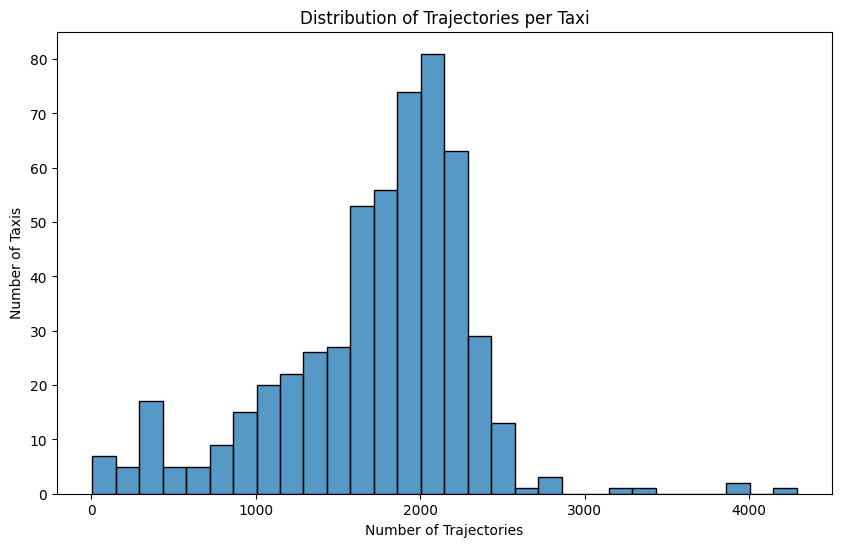

In [ ]:
trajectories_per_taxi = df.groupby('taxi_code')['trajectory_id'].nunique()
plt.figure(figsize=(10,6))
sns.histplot(trajectories_per_taxi, bins=30, kde=False)
plt.title('Distribution of Trajectories per Taxi')
plt.xlabel('Number of Trajectories')
plt.ylabel('Number of Taxis')
plt.show()


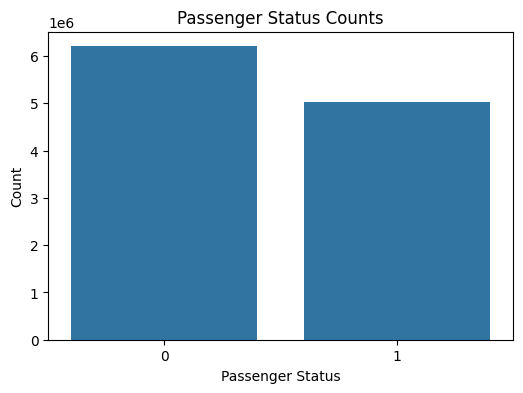

In [ ]:
passenger_status_counts = df['passenger_status'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=passenger_status_counts.index, y=passenger_status_counts.values)
plt.title('Passenger Status Counts')
plt.xlabel('Passenger Status')
plt.ylabel('Count')
plt.show()


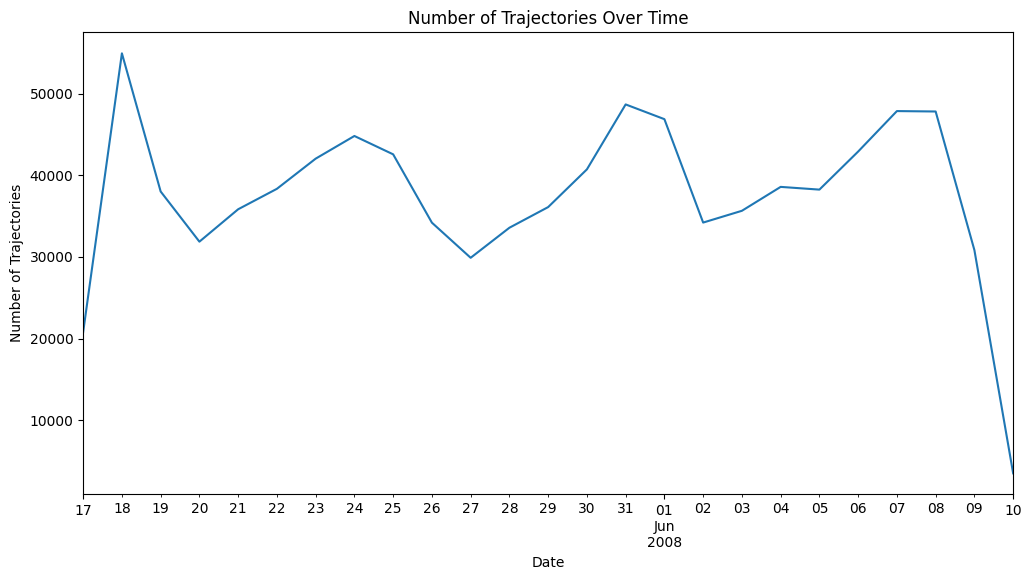

In [ ]:
df.set_index('timestamp', inplace=True)
trips_over_time = df.resample('D')['trajectory_id'].nunique()
plt.figure(figsize=(12,6))
trips_over_time.plot()
plt.title('Number of Trajectories Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trajectories')
plt.show()


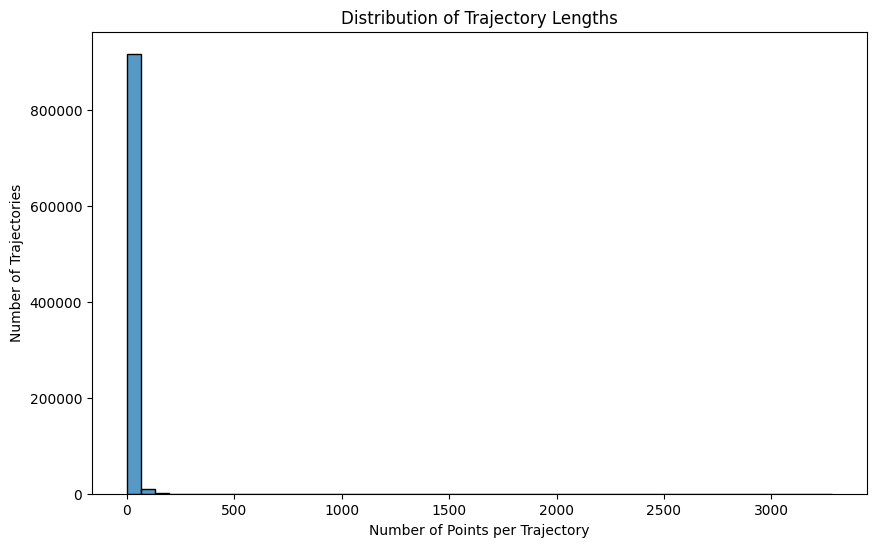

In [ ]:
trajectory_lengths = df.groupby('trajectory_id').size()
plt.figure(figsize=(10,6))
sns.histplot(trajectory_lengths, bins=50, kde=False)
plt.title('Distribution of Trajectory Lengths')
plt.xlabel('Number of Points per Trajectory')
plt.ylabel('Number of Trajectories')
plt.show()

In [ ]:
# Remove trajectories with less than 2 data points
valid_trajectories = trajectory_lengths[trajectory_lengths > 1].index
df = df[df['trajectory_id'].isin(valid_trajectories)]


## visualization using geolocation

In [ ]:
# Get a list of unique trajectory IDs
unique_trajectories = df['trajectory_id'].unique()

# Sample 5 random trajectories
sampled_trajectories = np.random.choice(unique_trajectories, size=1000, replace=False)

# Filter the DataFrame for these trajectories
df_sampled = df[df['trajectory_id'].isin(sampled_trajectories)]


In [ ]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12522 entries, 2008-06-07 04:17:12 to 2008-05-30 19:43:06
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          12522 non-null  float64
 1   longitude         12522 non-null  float64
 2   passenger_status  12522 non-null  int64  
 3   epoch_timestamp   12522 non-null  int64  
 4   trajectory_id     12522 non-null  int64  
 5   taxi_code         12522 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 684.8+ KB


In [ ]:
# Coordinates for San Francisco
sf_latitude = 37.7749
sf_longitude = -122.4194

# Create a Folium map centered on San Francisco
m = folium.Map(location=[sf_latitude, sf_longitude], zoom_start=12)


In [ ]:
# Group the data by trajectory_id
grouped = df_sampled.groupby('trajectory_id')

# Define colors for different trajectories
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
          'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
          'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
          'gray', 'black', 'lightgray']

for i, (traj_id, traj_data) in enumerate(grouped):
    # Get the list of coordinate pairs for this trajectory
    coordinates = traj_data[['latitude', 'longitude']].values.tolist()

    # Add the trajectory to the map
    folium.PolyLine(locations=coordinates,
                    color=colors[i % len(colors)],
                    weight=2.5,
                    opacity=1,
                    tooltip=f'Trajectory ID: {traj_id}').add_to(m)


In [ ]:
# Add a tile layer
folium.TileLayer('cartodbpositron').add_to(m)


# my part


In [ ]:
df.reset_index(inplace=True)
# Remove trajectories with less than 5 data points
trajectory_lengths = df.groupby('trajectory_id').size()
valid_trajectories = trajectory_lengths[trajectory_lengths >= 5].index
df = df[df['trajectory_id'].isin(valid_trajectories)]


In [ ]:
# Filter data for peak hours
df['hour'] = df['timestamp'].dt.hour
df = df[(df['hour'] >= 7) & (df['hour'] <= 21)]


In [ ]:
df.sort_values('timestamp', inplace=True)
start_date = df['timestamp'].min().normalize()  # Start from the earliest date in the dataset
end_date = start_date + pd.Timedelta(days=2)

# Filter the DataFrame for the 2-day period
df2 = df[(df['timestamp'] >= start_date) & (df['timestamp'] < end_date)].copy()

In [ ]:
df2

timestamp  latitude  longitude  passenger_status  \
5465543 2008-05-17 10:00:04  37.77329 -122.41844                 0   
2154215 2008-05-17 10:00:04  37.74798 -122.41570                 0   
1051670 2008-05-17 10:00:04  37.78781 -122.39055                 1   
8839244 2008-05-17 10:00:04  37.75452 -122.46566                 0   
4013913 2008-05-17 10:00:04  37.79611 -122.42011                 1   
...                     ...       ...        ...               ...   
8303823 2008-05-18 21:59:59  37.71576 -122.39859                 1   
2596437 2008-05-18 21:59:59  37.74838 -122.40836                 0   
3129854 2008-05-18 21:59:59  37.77540 -122.41947                 1   
7422679 2008-05-18 21:59:59  37.72126 -122.40031                 1   
3503621 2008-05-18 21:59:59  37.78887 -122.41897                 1   

         epoch_timestamp  trajectory_id taxi_code  hour  
5465543       1211018404         452962  ickphiwa    10  
2154215       1211018404         174811   aydwaho    10  
1051670       1211018404          84555   aldhidd    10  
8839244       1211018404         733808    omwyek    10  
4013913       1211018404         328833   enkkand    10  
...                  ...            ...       ...   ...  
8303823       1211147999         689814  oivnabyo    21  
2596437       1211147999         211399    eccest    21  
3129854       1211147999         256417    eesbaj    21  
7422679       1211147999         616889  oapwycti    21  
3503621       1211147999         287609    ejcrur    21  

[509126 rows x 8 columns]

In [ ]:
# Select 100 unique trajectory IDs randomly
unique_trajectories = df2['trajectory_id'].unique()
selected_trajectories = np.random.choice(unique_trajectories, 100, replace=False)

# Filter the data to include only the selected 100 trajectory IDs
df2 = df2[df2['trajectory_id'].isin(selected_trajectories)]

In [ ]:
df2

timestamp  latitude  longitude  passenger_status  \
1122763 2008-05-17 10:07:28  37.75871 -122.45102                 1   
1122762 2008-05-17 10:09:27  37.76410 -122.44615                 1   
1122761 2008-05-17 10:10:32  37.76994 -122.44690                 1   
1122760 2008-05-17 10:11:22  37.77218 -122.44478                 1   
1122759 2008-05-17 10:12:34  37.77374 -122.43293                 1   
...                     ...       ...        ...               ...   
9470233 2008-05-18 21:57:26  37.76576 -122.46888                 1   
9274618 2008-05-18 21:57:37  37.80098 -122.43633                 1   
9470232 2008-05-18 21:58:16  37.76584 -122.46843                 1   
9274617 2008-05-18 21:58:38  37.80464 -122.43706                 1   
9274616 2008-05-18 21:59:38  37.80538 -122.43727                 1   

         epoch_timestamp  trajectory_id taxi_code  hour  
1122763       1211018848          89876   amciuca    10  
1122762       1211018967          89876   amciuca    10  
1122761       1211019032          89876   amciuca    10  
1122760       1211019082          89876   amciuca    10  
1122759       1211019154          89876   amciuca    10  
...                  ...            ...       ...   ...  
9470233       1211147846         787250   osoccef    21  
9274618       1211147857         771258    oquiat    21  
9470232       1211147896         787250   osoccef    21  
9274617       1211147918         771258    oquiat    21  
9274616       1211147978         771258    oquiat    21  

[1480 rows x 8 columns]

In [ ]:
import pandas as pd
import numpy as np
import math
import folium
from IPython.display import display

# Step 1: Haversine function to calculate the distance between two points on the Earth
def getDistance(lat1, lon1, lat2, lon2):
    """
    Calculate the distance between two coordinates on Earth using the Haversine formula.
    Input: Coordinates (latitude and longitude) for two points.
    Output: Distance between the points in kilometers.
    """
    R = 6371.0  # Radius of the Earth in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # Distance in kilometers

# Step 2: Time difference calculation in minutes
def getTimeDifference(time1, time2):
    """
    Calculate the time difference between two epochs (timestamps) in minutes.
    Input: time1, time2 (epoch timestamps)
    Output: Time difference in minutes.
    """
    return abs(time1 - time2) / 60  # Convert seconds to minutes

# Step 3: Find neighbors within a given distance and time window
def getNeighbors(df, point_idx, eps, time_flexibility, grid_size):
    """
    Find all points within 'eps' kilometers and within the 'time_flexibility' window of a given point.
    Input: DataFrame containing coordinates, index of the point, eps (distance in km), time flexibility in minutes, and grid_size.
    Output: List of neighboring points (indices).
    """
    neighbors = []
    lat1, lon1 = df.loc[point_idx, 'latitude'], df.loc[point_idx, 'longitude']
    time1 = df.loc[point_idx, 'epoch_timestamp']
    grid_x1, grid_y1 = df.loc[point_idx, 'grid_x'], df.loc[point_idx, 'grid_y']

    # Define range of neighboring grid cells to search in
    for idx, row in df.iterrows():
        grid_x2, grid_y2 = row['grid_x'], row['grid_y']
        if abs(grid_x1 - grid_x2) <= 1 and abs(grid_y1 - grid_y2) <= 1:  # Limit to adjacent grid cells
            lat2, lon2 = row['latitude'], row['longitude']
            time2 = row['epoch_timestamp']
            distance = getDistance(lat1, lon1, lat2, lon2)
            time_diff = getTimeDifference(time1, time2)

            # If the distance is within 'eps' and time is within flexibility, it's a neighbor
            if distance <= eps and time_diff <= time_flexibility:
                neighbors.append(idx)

    return neighbors

# Step 4: DBSCAN clustering algorithm with time flexibility
def dbscanClustering(df, eps, min_samples, grid_size, time_flexibility):
    """
    Apply DBSCAN clustering to the data using Haversine distance, time flexibility, and grid indexing.
    Input: DataFrame containing latitude, longitude, epoch_timestamp, eps (radius for neighbors), and min_samples.
    Output: A DataFrame with assigned cluster labels (-1 for noise).
    """
    # Initialize cluster labels (-1 for all points, meaning 'unclassified')
    df.loc[:, 'cluster'] = -1  # Use .loc to avoid the SettingWithCopyWarning

    cluster_id = 0  # Cluster counter

    for point_idx in df.index:
        # Skip already classified points
        if df.loc[point_idx, 'cluster'] != -1:
            continue

        # Get neighbors of the current point
        neighbors = getNeighbors(df, point_idx, eps, time_flexibility, grid_size)

        # Check if the point is a core point (enough neighbors to form a cluster)
        if len(neighbors) < min_samples:
            # Mark the point as noise (cluster = -1)
            df.loc[point_idx, 'cluster'] = -1
        else:
            # Start a new cluster
            cluster_id += 1
            expandCluster(df, point_idx, neighbors, cluster_id, eps, min_samples, grid_size, time_flexibility)

    return df

# Step 5: Expand the cluster recursively with time flexibility
def expandCluster(df, point_idx, neighbors, cluster_id, eps, min_samples, grid_size, time_flexibility):
    """
    Expand the cluster starting from the core point using Haversine distance, time flexibility, and grid indexing.
    Input: Data, index of the point, neighbors, current cluster ID, eps, and min_samples.
    """
    # Assign the current point to the cluster
    df.loc[point_idx, 'cluster'] = cluster_id

    # Initialize the seed set with the neighbors
    seed_set = neighbors

    i = 0
    while i < len(seed_set):
        current_point = seed_set[i]

        # If the current point is unclassified, assign it to the cluster
        if df.loc[current_point, 'cluster'] == -1:
            df.loc[current_point, 'cluster'] = cluster_id

        # If the current point is a core point, expand the cluster
        current_neighbors = getNeighbors(df, current_point, eps, time_flexibility, grid_size)
        if len(current_neighbors) >= min_samples:
            # Add current neighbors to the seed set
            seed_set = seed_set + [p for p in current_neighbors if p not in seed_set]

        i += 1

# Step 6: Visualize Clusters on a Map
def visualize_clusters_on_map(clustered_df):
    """
    Visualize the clusters on an interactive map using Folium in Colab.
    """
    # Initialize a base map centered around the average latitude and longitude
    map_center = [clustered_df['latitude'].mean(), clustered_df['longitude'].mean()]
    m = folium.Map(location=map_center, zoom_start=10, width='100%', height='100%')

    # Assign a random color to each cluster
    cluster_colors = {cluster: f'#{np.random.randint(0, 0xFFFFFF):06x}' for cluster in clustered_df['cluster'].unique()}

    # Plot each point on the map
    for idx, row in clustered_df.iterrows():
        color = cluster_colors[row['cluster']]
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=3,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=f"Cluster: {row['cluster']}, Taxi: {row['taxi_code']}, Time: {row['epoch_timestamp']}"
        ).add_to(m)

    # Display the map inline in Colab
    display(m)

# Step 7: Prepare Data
def prepare_data(df, grid_size):
    """
    Prepare the data by resetting the index, creating grid indices, and ensuring numerical indexing.
    """
    df = df.reset_index()  # Reset index to make sure we use numerical index
    # Create grid_x and grid_y columns based on latitude and longitude
    df['grid_x'] = (df['latitude'] / grid_size).astype(int)
    df['grid_y'] = (df['longitude'] / grid_size).astype(int)
    return df

# Example usage with df2
eps = 0.5  # 0.5 km radius
min_samples = 5  # Minimum points to form a cluster
grid_size = 0.01  # Grid size based on latitude/longitude degrees
time_flexibility = 30  # Time flexibility in minutes

# Prepare the dataset
df2 = prepare_data(df2, grid_size)

#


In [ ]:
# Apply DBSCAN clustering with grid indexing and time flexibility
clustered_df2 = dbscanClustering(df2, eps, min_samples, grid_size, time_flexibility)

# Visualize the clusters on a map in Colab
visualize_clusters_on_map(clustered_df2)

In [ ]:
print(clustered_df2)

        index           timestamp  latitude  longitude  passenger_status  \
0     1122763 2008-05-17 10:07:28  37.75871 -122.45102                 1   
1     1122762 2008-05-17 10:09:27  37.76410 -122.44615                 1   
2     1122761 2008-05-17 10:10:32  37.76994 -122.44690                 1   
3     1122760 2008-05-17 10:11:22  37.77218 -122.44478                 1   
4     1122759 2008-05-17 10:12:34  37.77374 -122.43293                 1   
...       ...                 ...       ...        ...               ...   
1475  9470233 2008-05-18 21:57:26  37.76576 -122.46888                 1   
1476  9274618 2008-05-18 21:57:37  37.80098 -122.43633                 1   
1477  9470232 2008-05-18 21:58:16  37.76584 -122.46843                 1   
1478  9274617 2008-05-18 21:58:38  37.80464 -122.43706                 1   
1479  9274616 2008-05-18 21:59:38  37.80538 -122.43727                 1   

      epoch_timestamp  trajectory_id taxi_code  hour  grid_x  grid_y  cluster  
0      

In [ ]:
noise_data = clustered_df2[clustered_df2['cluster'] == -1]
print(noise_data)

        index           timestamp  latitude  longitude  passenger_status  \
0     1122763 2008-05-17 10:07:28  37.75871 -122.45102                 1   
1     1122762 2008-05-17 10:09:27  37.76410 -122.44615                 1   
2     1122761 2008-05-17 10:10:32  37.76994 -122.44690                 1   
3     1122760 2008-05-17 10:11:22  37.77218 -122.44478                 1   
4     1122759 2008-05-17 10:12:34  37.77374 -122.43293                 1   
...       ...                 ...       ...        ...               ...   
1434  9470257 2008-05-18 21:25:05  37.80386 -122.45137                 1   
1436  9470256 2008-05-18 21:26:06  37.80349 -122.46974                 1   
1460  9274627 2008-05-18 21:49:50  37.78812 -122.44028                 1   
1461  9274626 2008-05-18 21:50:42  37.78940 -122.43739                 1   
1463  9274625 2008-05-18 21:51:36  37.78992 -122.43404                 1   

      epoch_timestamp  trajectory_id taxi_code  hour  grid_x  grid_y  cluster  
0      

In [ ]:
noise_data.shape

(592, 12)

In [ ]:
# Step 8: Generate Bus Paths (Centroid of each cluster)
def generate_bus_paths(clustered_df):
    """
    Generate bus paths by calculating the centroid (average latitude and longitude) of each cluster.
    Output: A DataFrame with bus stop locations (cluster centroids).
    """
    bus_paths = clustered_df.groupby('cluster').agg({
        'latitude': 'mean',
        'longitude': 'mean'
    }).reset_index()
    bus_paths = bus_paths[bus_paths['cluster'] != -1]  # Ignore noise points (-1 cluster)
    bus_paths['stop_name'] = ['Stop ' + str(i+1) for i in range(len(bus_paths))]  # Name the stops
    return bus_paths

# Step 9: Calculate Commute Path (simple straight line for now, but can be expanded)
def calculate_commute_path(bus_paths):
    """
    Calculate the commute path by connecting the bus stops in the order they are generated.
    Output: A list of tuples representing the commute path (latitude, longitude).
    """
    commute_path = bus_paths[['latitude', 'longitude']].values.tolist()
    return commute_path

# Step 10: Visualize Clusters and Bus Paths on Map
def visualize_clusters_and_bus_paths(clustered_df, bus_paths, commute_path):
    """
    Visualize both clusters and bus paths on an interactive map using Folium.
    """
    # Initialize a base map centered around the average latitude and longitude
    map_center = [clustered_df['latitude'].mean(), clustered_df['longitude'].mean()]
    m = folium.Map(location=map_center, zoom_start=10, width='100%', height='100%')

    # Assign a random color to each cluster (reuse existing cluster visualization function)
    cluster_colors = {cluster: f'#{np.random.randint(0, 0xFFFFFF):06x}' for cluster in clustered_df['cluster'].unique()}

    # Plot each cluster point on the map
    for idx, row in clustered_df.iterrows():
        color = cluster_colors[row['cluster']]
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=3,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=f"Cluster: {row['cluster']}, Taxi: {row['taxi_code']}, Time: {row['epoch_timestamp']}"
        ).add_to(m)

    # Plot each bus stop on the map
    for idx, row in bus_paths.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"Bus Stop: {row['stop_name']}",
            icon=folium.Icon(color='blue', icon='bus', prefix='fa')
        ).add_to(m)

    # Plot the commute path as a line connecting the bus stops
    folium.PolyLine(commute_path, color="red", weight=2.5, opacity=1).add_to(m)

    # Display the map inline
    display(m)

# Step 2: Generate bus paths based on the clustering result
bus_paths = generate_bus_paths(clustered_df2)

# Step 3: Calculate the commute path
commute_path = calculate_commute_path(bus_paths)

# Step 4: Visualize both clusters and bus paths
visualize_clusters_and_bus_paths(clustered_df2, bus_paths, commute_path)
